this script will compare the ccans distributions across different chromosome for each renal_region_new using Nicolas' method. It also generate a baseline plot from ncbi website. If possible, a distribution for patient-wise comparison will be generated (to do)

In [2]:
library(ChIPseeker)
library(dplyr)
library(repr)
library(ggplot2)

## create plots_dir based on data and method type 

In [3]:
data_folder = "../../processed_data/Cicero/324701_cells_by_renal_region_new/"
coaccess_cutoff_override = 0.2
chrom_order = c(as.character(1:22), "X")
chrom_order

[1] "1"  "2"  "3"  "4"  "5"  "6"  "7"  "8"  "9"  "10" "11" "12" "13" "14" "15"
[16] "16" "17" "18" "19" "20" "21" "22" "X"

In [4]:
plots_dir = file.path("../../plots/Cicero/324701_cells_by_renal_region_new/histograms")
plots_dir
dir.create(plots_dir, recursive = T, showWarnings = F)

[1] "../../plots/Cicero/324701_cells_by_renal_region_new/histograms"

## create gene number and base number for each human chromosome

https://www.ncbi.nlm.nih.gov/books/NBK22266/#:~:text=The%20Human%20Genome%20Project%20aims,30%2C000%20genes%20in%20human%20DNA.

The num_base column has the unit of 'million base pairs'

In [6]:
ncbi_gene_num = data.frame(
chrom = c(as.character(1:22), "X", "Y"),
num_gene = c(3000, 2500, 1900, 1600, 1700, 1900, 1800, 1400, 1400, 1400, 2000, 1600, 800, 1200, 1200, 1300, 1600, 600, 1700, 900, 400, 800, 1400, 200),
num_base = c(240,  240,  200,  190,  180,  170,  150,  140,  130,  130,  130,  130,  110, 100,  100,  90,   80,   70,  60,   60,  40,  40,  150,  50))
ncbi_gene_num$chrom = factor(ncbi_gene_num$chrom, levels = ncbi_gene_num$chrom)
# save(ncbi_gene_num, file = file.path("..", "meta","ncbi_gene_num.RData"))

## generate barplot for number of genes and base pairs across human chromosome

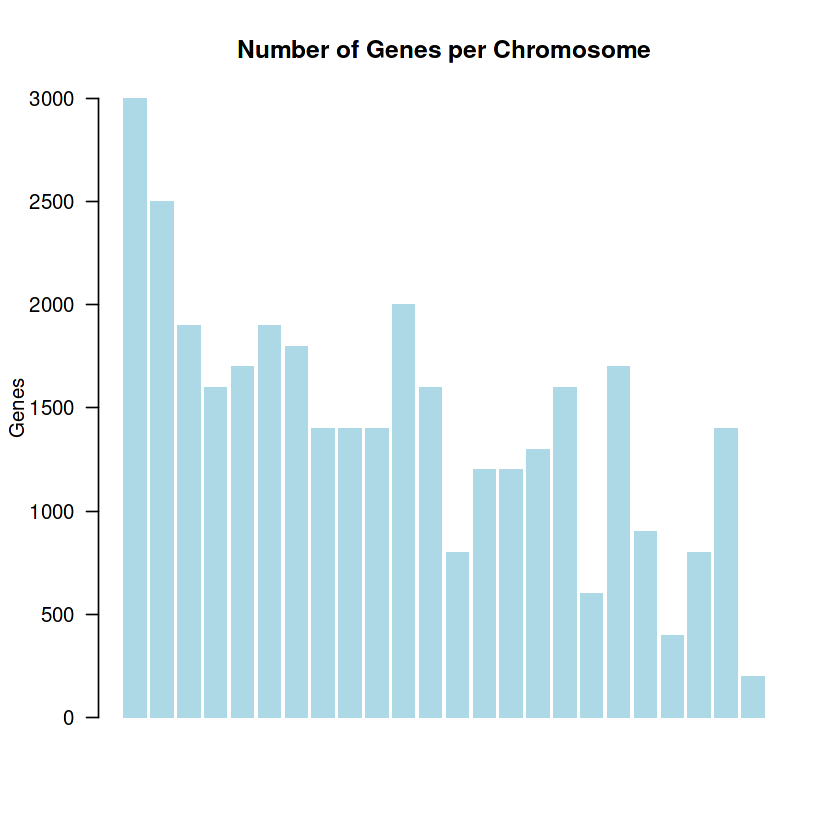

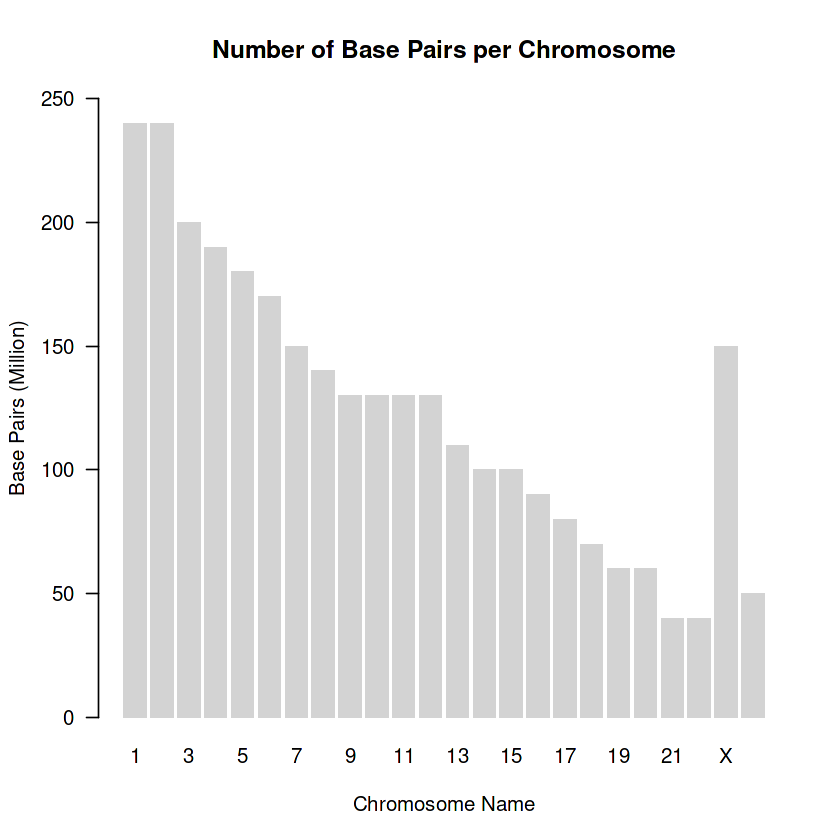

In [76]:
par(family = "Helvetica", lty = 0)
barplot(height=ncbi_gene_num$num_gene, names=ncbi_gene_num$chrom, las=2, col="lightblue", ylab="Genes", ylim=c(0,3000), xaxt='n', main = "Number of Genes per Chromosome")
barplot(height=ncbi_gene_num$num_base, names=ncbi_gene_num$chrom, las=1, col="lightgrey", ylab="Base Pairs (Million)", xlab = "Chromosome Name", ylim=c(0,250), main = "Number of Base Pairs per Chromosome")

##### 

## load ccan from data folder

In [17]:
ccan_folder = data_folder
coaccess_cutoff_override = coaccess_cutoff_override
ccan_list = dir(ccan_folder)
ccan_list

[1] "conns_ccan_all_regions.RData"  "conns_ccan_Cortex.RData"      
[3] "conns_ccan_Medulla.RData"      "conns_ccan_Papilla.RData"     
[5] "conns_ccan_Renal Artery.RData" "conns_ccan_Ureter.RData"

In [18]:
ccan_distribution_list = lapply(ccan_list, FUN = function(ccan_file){
    load(file.path(ccan_folder, ccan_file))

    if(!is.null(coaccess_cutoff_override)){
    message("recalculating ccans using updated coaccess_cutoff_override value")
    require(cicero)
    CCAN_assigns <- generate_ccans(conns, coaccess_cutoff_override = coaccess_cutoff_override)

    CCAN_assigns$chrom = sapply(CCAN_assigns$Peak, FUN = function(xx){
        gsub("chr", "", strsplit(xx, split = "-")[[1]][1])
    })  

    ccan_distribution = (table(CCAN_assigns$chrom)[chrom_order])
    ccan_distribution = data.frame(chrom = names(ccan_distribution), num_ccan = as.numeric(ccan_distribution))
    for (rrn_level in level.renal_region_new){
        if (grepl(rrn_level, ccan_file)) ccan_distribution$Region = rrn_level
    }

    return(ccan_distribution)
}
})



recalculating ccans using updated coaccess_cutoff_override value

Loading required package: cicero

Loading required package: monocle3

Loading required package: Biobase

Loading required package: BiocGenerics

Loading required package: parallel


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB


The following objects are masked from ‘package:dplyr’:

    combine, intersect, setdiff, union


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.in

[1] "Coaccessibility cutoff used: 0.2"


recalculating ccans using updated coaccess_cutoff_override value



[1] "Coaccessibility cutoff used: 0.2"


recalculating ccans using updated coaccess_cutoff_override value



[1] "Coaccessibility cutoff used: 0.2"


recalculating ccans using updated coaccess_cutoff_override value



[1] "Coaccessibility cutoff used: 0.2"


recalculating ccans using updated coaccess_cutoff_override value



[1] "Coaccessibility cutoff used: 0.2"


recalculating ccans using updated coaccess_cutoff_override value



[1] "Coaccessibility cutoff used: 0.2"


### make bar plot for combined 5 regions

In [78]:
ccan_distribution_df = do.call(rbind, ccan_distribution_list[1])
ccan_distribution_df$Region = "All"
dim(ccan_distribution_df)
ccan_distribution_df$chrom = factor(ccan_distribution_df$chrom, levels = chrom_order)

[1] 23  3

In [80]:
ccan_distribution_df = rbind(ccan_distribution_df, data.frame("chrom" = "Y", "num_ccan" = 0, "Region" = "All"))
ccan_distribution_df

chrom,num_ccan,Region
<fct>,<dbl>,<chr>
1,816,All
2,676,All
3,361,All
4,293,All
5,425,All
6,464,All
7,413,All
8,413,All
9,386,All


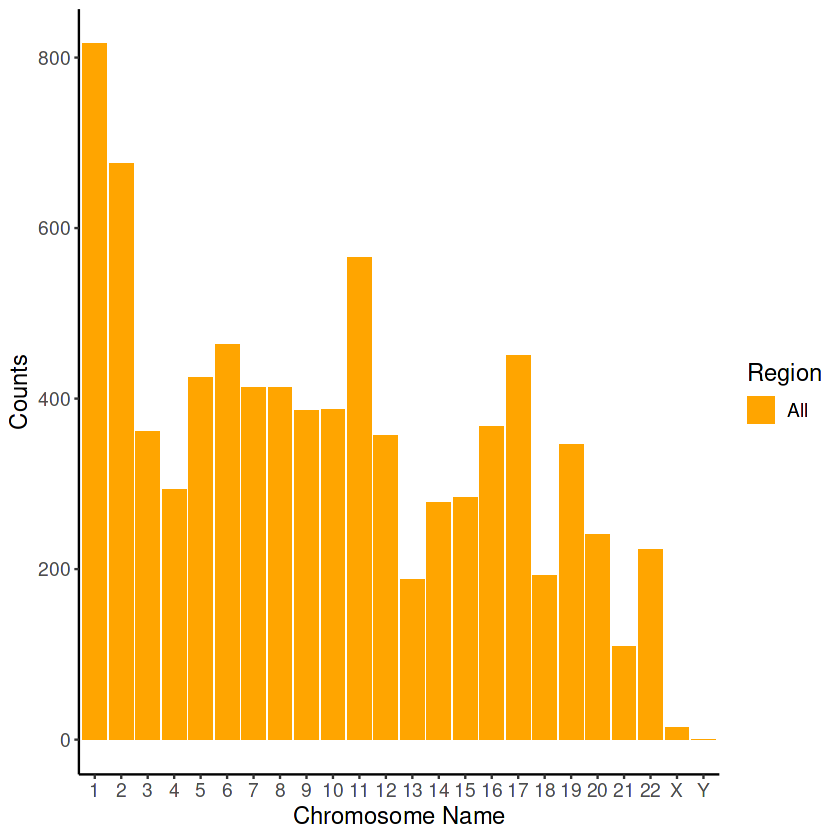

In [81]:
p = ggplot(ccan_distribution_df, aes(x=chrom, y=num_ccan, fill=Region)) + 
#   geom_bar(stat="identity", position=position_dodge()) +
  geom_bar(stat="identity", position="stack") +
  scale_fill_manual(values = "orange") +
  labs(y= "Counts", x = "Chromosome Name") + 
  theme_classic() + 
  theme(text=element_text(family="Helvetica", size=14))
p

### combine number of genes per chromsome and ccan_distribution

In [86]:
output_plot_png = file.path(plots_dir, "gene_CCANs.png")
output_plot_pdf = file.path(plots_dir, "gene_CCANs.pdf")

png(output_plot_png, width = 12, height = 6, units = 'in', res = 300)
par(mfrow=c(2,1), oma = c(0.5,0.5,0.5,0.5) + 0.1, mar = c(1.5,4,1,0)+0.1, family = "Helvetica", lty = 0) 
barplot(height=ncbi_gene_num$num_gene, names=ncbi_gene_num$chrom, las=2, col="lightblue", ylab="Genes", ylim=c(0,3000), xaxt='n', main = "Number of Genes per Chromosome")
barplot(height=ccan_distribution_df$num_ccan, names=ccan_distribution_df$chrom, las=1, col="Orange", ylab="CCANs", xlab = "Chromosome Name", ylim=c(0,820), main = "Number of CCANs per Chromosome")
dev.off()

pdf(output_plot_pdf, width = 12, height = 6)
par(mfrow=c(2,1), oma = c(0.5,0.5,0.5,0.5) + 0.1, mar = c(1.5,4,1,0)+0.1, family = "Helvetica", lty = 0) 
barplot(height=ncbi_gene_num$num_gene, names=ncbi_gene_num$chrom, las=2, col="lightblue", ylab="Genes", ylim=c(0,3000), xaxt='n', main = "Number of Genes per Chromosome")
barplot(height=ccan_distribution_df$num_ccan, names=ccan_distribution_df$chrom, las=1, col="Orange", ylab="CCANs", xlab = "Chromosome Name", ylim=c(0,820), main = "Number of CCANs per Chromosome")
dev.off()

png 
  2

png 
  2

In [87]:
write.csv(ncbi_gene_num, "../../plots/Cicero/324701_cells_by_renal_region_new/histograms/gene_per_chromosome.csv")

In [88]:
write.csv(ccan_distribution_df, "../../plots/Cicero/324701_cells_by_renal_region_new/histograms/CCAN_per_chromosome.csv")